In [1]:
import nltk

In [2]:
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_raw[:1000]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

# 토큰 생성
    - 자연어 문서에서 분석을 위해 긴 문자열을 작은 단위로 나누는 것
    - 문장 단위, 단어 단위, 정규표현식으로 나눌 수 있음

In [5]:
# 문장 단위 토큰
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:10000])[:3])

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.']


In [6]:
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[10:100]))

['ane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [7]:
# 정규표현식 토큰생성
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer("[\w]+")
token.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

# 형태소 분석
    - 형태소 : 언어학에서 일정한 의미가 있는 가장 작은 말의 단위
    - 보통 자연어 처리에서 토큰으로 형태소를 이용
    - 형태소 분석 : 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고
        이를 이용하여 형태소를 찾아내거나 처리하는 작업
    - 형태소 분석의 예
        - 어간 추출
        - 원형 복원
        - 품사 부착

# 어간 추출
PorterStemmer, LancasterStemmer
    - 어간추출은 단순히 어미만 제거함

In [8]:
from nltk.stem import LancasterStemmer, PorterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']
print("Porter stemmer : ", [st1.stem(w) for w in words])
print("Lancaster stemmer : ", [st2.stem(w) for w in words])

Porter stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster stemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


In [9]:
list1 = []
for w in range(10):
    list1.append(w ** 2)
print(list1)

list2 = [w ** 2 for w in range(10)]
print(list2)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


# 원형복원
    - 같은 의미를 가진 여러 단어를 사전형으로 통일하는 작업

In [10]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jinho\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
lm = WordNetLemmatizer()
print([lm.lemmatize(w, 'v') for w in words])

list2 = []
for w in words:
    list2.append(lm.lemmatize(w, 'v'))
print(list2)

['fly', 'fly', 'fly', 'fly', 'fly']
['fly', 'fly', 'fly', 'fly', 'fly']


# 품사 부착
    - 품사는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것
    - 품사의 예
        - NMP : 단순고유명사
        - VB : 동사
        - VBP : 동사현재형
        - NN : 명사
        - DT : 관형사

In [32]:
from nltk.tag import pos_tag
sentence = 'Emma refused to permit us to obtain the refuse permit'

tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

['Emma', 'refused', 'to', 'permit', 'us', 'to', 'obtain', 'the', 'refuse', 'permit']


[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [13]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [14]:
noun_list = [[t[0] for t in tagged_list if t[1] == 'NN']]
noun_list

noun_list2 = []
for t in tagged_list:
    if t[1] == 'NN':
        noun_list2.append(t[0])
noun_list2

['refuse', 'permit']

In [15]:
noun_list3 = [t[0] if t[1] == 'VB' else '-' for t in tagged_list]
noun_list3

noun_list4 = []
for t in tagged_list:
    if t[1] == 'VB':
        noun_list4.append(t[0])
    else:
        noun_list4.append('-')
noun_list4

['-', '-', '-', 'permit', '-', '-', 'obtain', '-', '-', '-']

In [16]:
from nltk.tag import untag

untag_list = untag(tagged_list)
untag_list

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

# Text 클래스
    - 문서 분석에 유용한 메소드 제공

In [17]:
from nltk import Text

text = Text(token.tokenize(emma_raw))
print(text)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


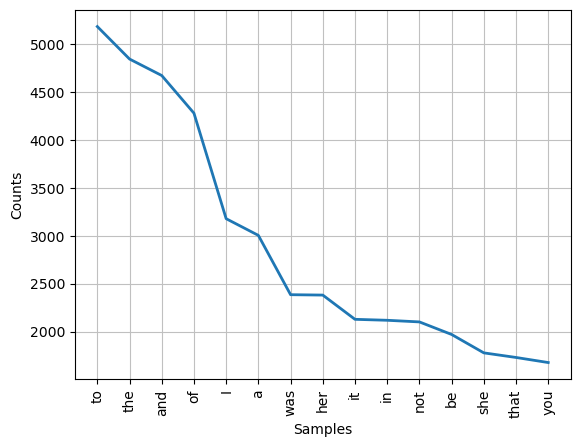

In [18]:
import matplotlib.pyplot as plt
text.plot(15)
plt.show()

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

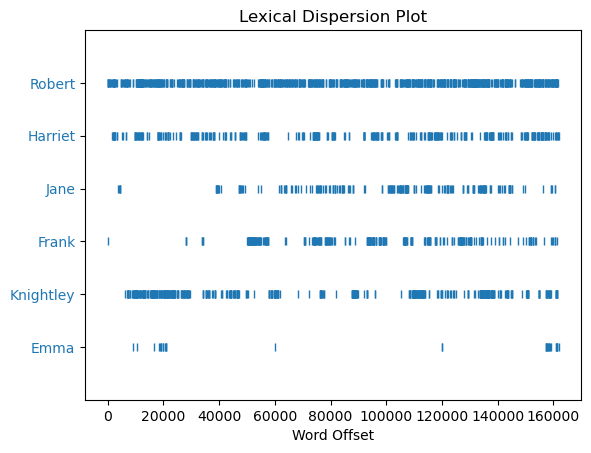

In [19]:
nltk.draw.dispersion_plot(text, ["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [20]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [21]:
text.similar('Emma')

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [22]:
text.common_contexts(['Emma', 'she'])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


# FreqDist
    - 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
    - vocab() 메소드로 추출

In [23]:
fd = text.vocab()
fd

FreqDist({'to': 5183, 'the': 4844, 'and': 4672, 'of': 4279, 'I': 3178, 'a': 3004, 'was': 2385, 'her': 2381, 'it': 2128, 'in': 2118, ...})

In [24]:
from nltk import FreqDist

stopword = ['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs', 'Dear', 'A', 'No', 'Ah', 'Oh']
# 감탄사들도 서치에 걸려서(대문자) 제외

emma_tokens = pos_tag(token.tokenize(emma_raw))
# 나누어진 토큰들에 태그, 형태소가 고유명사이고, 고유명사들 중에서 이런 글자가 아닌것을 뽑을것

names_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopword]
fd_names = FreqDist(names_list)
fd_names

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [25]:
print(fd_names.N()) # 전체 단어의 수
print(fd_names['Emma']) # 주어진 단어의 빈도수
print(fd_names.freq('Emma')) # 주어진 단어의 출현 빈도 비율

7511
830
0.11050459326321395


In [26]:
fd_names.most_common(20) # 제일 위에서 20개 뽑아옴

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208),
 ('Hartfield', 160),
 ('Bates', 141),
 ('Highbury', 123),
 ('John', 90),
 ('Randalls', 89),
 ('Smith', 89),
 ('Martin', 85),
 ('Perry', 79),
 ('How', 69),
 ('Well', 69)]

In [27]:
! pip install pillow
! pip install wordcloud

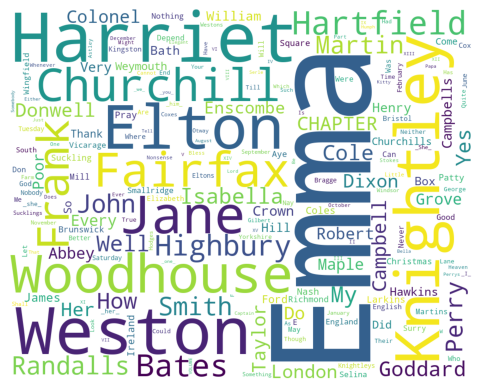

In [31]:
from wordcloud import WordCloud

wc = WordCloud(width = 1000, height = 800, background_color = 'white', random_state = 0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.savefig('data/wordcloud.png')
plt.show()